# VGG16 on Cifar10 Dataset

#### Importing Necessary Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Convolution2D,MaxPooling2D,Dropout,Dense,Flatten, GlobalAveragePooling2D
from keras import models,losses,optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

Using TensorFlow backend.


#### Loading the dataset and performing inbuilt pre-processing

In [2]:
from tensorflow.keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_train = ohe.fit_transform(y_train).toarray().astype(int)
y_test = ohe.transform(y_test).toarray().astype(int)
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

170500096/170498071 [==============================] - 4s 0us/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


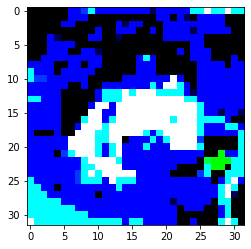

In [3]:
plt.imshow(X_train[0])

#### Function to resize the input image
    - Intitial size : (32x32)
    - Final size : (139x139)

In [0]:
def resize_data(data):
    data_upscaled = []
    for i, img in enumerate(data):
        large_img = cv2.resize(img, dsize=(139,139))
        data_upscaled.append(large_img)
    return data_upscaled
X_train = np.array(resize_data(X_train))
X_test = np.array(resize_data(X_test))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


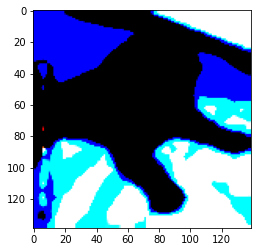

In [5]:
import matplotlib.pyplot as plt
#print(X_train.mean())
plt.imshow(X_train[56])

In [11]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(50000, 139, 139, 3) (10000, 139, 139, 3) (50000, 10) (10000, 10)


#### Model Building

In [7]:
base = VGG16(include_top = False,weights='imagenet',input_shape = (139,139,3))
model = models.Sequential()
model.add(base)
model.add(GlobalAveragePooling2D())
model.add(Dense(4096, activation='relu', name='Dense_Intermediate'))
model.add(Dropout(0.5, name='Dropout_Regularization'))
model.add(Dense(10, activation='softmax', name='Output'))

58892288/58889256 [==============================] - 2s 0us/step


#### Freezing the layers in base model

In [0]:
for cnnlayer in model.layers[0].layers:
    cnnlayer.trainable = False
model.layers[0].trainable = False

In [0]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
Dense_Intermediate (Dense)   (None, 4096)              2101248   
_________________________________________________________________
Dropout_Regularization (Drop (None, 4096)              0         
_________________________________________________________________
Output (Dense)               (None, 10)                40970     
Total params: 16,856,906
Trainable params: 2,142,218
Non-trainable params: 14,714,688
_________________________________________________________________


In [12]:
model.fit(X_train,y_train,epochs=10,batch_size=500,validation_data=(X_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 245s 5ms/step - loss: 0.8775 - accuracy: 0.7868 - val_loss: 0.4126 - val_accuracy: 0.8584
Epoch 2/10
50000/50000 [==============================] - 228s 5ms/step - loss: 0.3775 - accuracy: 0.8706 - val_loss: 0.3909 - val_accuracy: 0.8696
Epoch 3/10
50000/50000 [==============================] - 229s 5ms/step - loss: 0.3098 - accuracy: 0.8928 - val_loss: 0.3830 - val_accuracy: 0.8713
Epoch 4/10
50000/50000 [==============================] - 228s 5ms/step - loss: 0.2561 - accuracy: 0.9101 - val_loss: 0.3626 - val_accuracy: 0.8770
Epoch 5/10
50000/50000 [==============================] - 228s 5ms/step - loss: 0.2155 - accuracy: 0.9264 - val_loss: 0.3612 - val_accuracy: 0.8788
Epoch 6/10
50000/50000 [==============================] - 227s 5ms/step - loss: 0.1803 - accuracy: 0.9384 - val_loss: 0.3648 - val_accuracy: 0.8809
Epoch 7/10
50000/50000 [==============================] - 228s

#### Performance Evaluation

In [0]:
from sklearn.metrics import precision_score,recall_score,log_loss

In [14]:
y_pred = model.predict(X_test)
y_pred = y_pred.round().astype(int)
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [15]:
classwise_precision = precision_score(y_test,y_pred, average=None)
for i in range(len(classwise_precision)):
  print("Precision for class {} = {}".format(i,classwise_precision[i]))
print("Mean Precision = ",classwise_precision.mean())

Precision for class 0 = 0.9445652173913044
Precision for class 1 = 0.9460020768431984
Precision for class 2 = 0.8880675818373812
Precision for class 3 = 0.8210290827740492
Precision for class 4 = 0.8501006036217303
Precision for class 5 = 0.8321678321678322
Precision for class 6 = 0.9049019607843137
Precision for class 7 = 0.905717151454363
Precision for class 8 = 0.8962616822429906
Precision for class 9 = 0.9274028629856851
Mean Precision =  0.8916216052102849


In [16]:
classwise_recall = recall_score(y_test,y_pred, average=None)
for i in range(len(classwise_recall)):
  print("Recall for class {} = {}".format(i,classwise_recall[i]))
print("Mean Recall = ",classwise_recall.mean())

Recall for class 0 = 0.869
Recall for class 1 = 0.911
Recall for class 2 = 0.841
Recall for class 3 = 0.734
Recall for class 4 = 0.845
Recall for class 5 = 0.833
Recall for class 6 = 0.923
Recall for class 7 = 0.903
Recall for class 8 = 0.959
Recall for class 9 = 0.907
Mean Recall =  0.8724999999999999


In [17]:
print("Log Loss = ",log_loss(y_test,y_pred))

Log Loss =  3.707392258229722
